In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix




from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv(r"M:\ml\Datasets\archive (6)\HI-Medium_Trans.csv")

In [3]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6.794630e+03,US Dollar,6.794630e+03,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7.739290e+03,US Dollar,7.739290e+03,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1.880230e+03,US Dollar,1.880230e+03,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,7.396688e+07,US Dollar,7.396688e+07,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,4.586845e+07,US Dollar,4.586845e+07,US Dollar,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
31898233,2022/09/16 23:37,215117,84F680E11,223744,8521DCB81,5.675900e-02,Bitcoin,5.675900e-02,Bitcoin,Bitcoin,0
31898234,2022/09/16 23:59,1209449,84E4F43D1,123,8521E3901,1.229300e-02,Bitcoin,1.229300e-02,Bitcoin,Bitcoin,0
31898235,2022/09/16 23:47,214637,8521E8FF1,114,8521E8941,8.959400e-02,Bitcoin,8.959400e-02,Bitcoin,Bitcoin,0
31898236,2022/09/16 23:38,114,8521E9E41,114,8521E8941,3.956390e-01,Bitcoin,3.956390e-01,Bitcoin,Bitcoin,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


In [5]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,3.189824e+07,3.189824e+07,3.189824e+07,3.189824e+07,3.189824e+07
mean,2.944094e+05,4.093198e+05,6.431116e+06,4.417551e+06,1.104450e-03
std,6.153149e+05,6.547003e+05,2.592744e+09,1.848313e+09,3.321491e-02
min,0.000000e+00,0.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2.954000e+03,2.749600e+04,2.078700e+02,2.092300e+02,0.000000e+00
50%,3.902400e+04,1.468530e+05,1.469250e+03,1.471540e+03,0.000000e+00
75%,2.158840e+05,2.598930e+05,1.183530e+04,1.175781e+04,0.000000e+00
max,3.225455e+06,3.225455e+06,8.158609e+12,8.158609e+12,1.000000e+00


In [6]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns


In [7]:
for col in cat_col:
  df[col] = df[col].str.lower()

In [8]:
df.columns = df.columns.str.lower()


In [9]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering
0,2022/09/01 00:17,20,800104d70,20,800104d70,6.794630e+03,us dollar,6.794630e+03,us dollar,reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7.739290e+03,us dollar,7.739290e+03,us dollar,reinvestment,0
2,2022/09/01 00:17,1208,80010e430,1208,80010e430,1.880230e+03,us dollar,1.880230e+03,us dollar,reinvestment,0
3,2022/09/01 00:03,1208,80010e650,20,80010e6f0,7.396688e+07,us dollar,7.396688e+07,us dollar,cheque,0
4,2022/09/01 00:02,1208,80010e650,20,80010ea30,4.586845e+07,us dollar,4.586845e+07,us dollar,cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
31898233,2022/09/16 23:37,215117,84f680e11,223744,8521dcb81,5.675900e-02,bitcoin,5.675900e-02,bitcoin,bitcoin,0
31898234,2022/09/16 23:59,1209449,84e4f43d1,123,8521e3901,1.229300e-02,bitcoin,1.229300e-02,bitcoin,bitcoin,0
31898235,2022/09/16 23:47,214637,8521e8ff1,114,8521e8941,8.959400e-02,bitcoin,8.959400e-02,bitcoin,bitcoin,0
31898236,2022/09/16 23:38,114,8521e9e41,114,8521e8941,3.956390e-01,bitcoin,3.956390e-01,bitcoin,bitcoin,0


In [10]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

X = df.drop("is laundering", axis=1)  
y = df["is laundering"]               

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=["is laundering"])], axis=1)



In [11]:
print(df_resampled["is laundering"].value_counts())


is laundering
0    35230
1    35230
Name: count, dtype: int64


In [12]:
df=df_resampled

In [3]:
df=pd.read_csv("ok.csv")

In [4]:
df.isnull().sum()

timestamp             0
from bank             0
account               0
to bank               0
account.1             0
amount received       0
receiving currency    0
amount paid           0
payment currency      0
payment format        0
is laundering         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop_duplicates()


In [7]:
df.duplicated().sum()

0

In [8]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns


In [9]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering
0,2022/09/09 06:20,29574,8053a7450,20724,80c0323a0,7376.49,us dollar,7376.49,us dollar,cash,0
1,2022/09/07 21:14,2142469,8341dc7f0,2153437,838c71cb0,1462.51,mexican peso,1462.51,mexican peso,ach,0
2,2022/09/09 03:15,1145753,835ca35c0,1140210,83636f140,1478.01,mexican peso,1478.01,mexican peso,credit card,0
3,2022/09/02 08:41,218456,8087af690,42983,820dd8f60,2573.59,euro,2573.59,euro,cheque,0
4,2022/09/15 22:44,9340,80f9c4840,34340,81fb792a0,50.16,us dollar,50.16,us dollar,credit card,0
...,...,...,...,...,...,...,...,...,...,...,...
70455,2022/09/21 17:07,295233,8230ce9c0,1818,80d7bb990,4365.08,us dollar,4365.08,us dollar,ach,1
70456,2022/09/16 23:55,70,1004288e8,1141540,838131750,5413.94,mexican peso,5413.94,mexican peso,cheque,1
70457,2022/09/16 23:57,2147650,838daa880,2155168,838daf3b0,79778.82,mexican peso,79778.82,mexican peso,ach,1
70458,2022/09/16 23:30,2167121,83e9abd80,1166873,83e9abdd0,2091.34,swiss franc,2091.34,swiss franc,ach,1


# univariate **analyssi**

# **`num column univariate analysis`**

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def num_col_uni(df, column_name):


  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column

  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Minimum and maximum values
  print(f"\nMinimum value of '{column_name}' column:", df[column_name].min())
  print(f"Maximum value of '{column_name}' column:", df[column_name].max())

  print("\n*************************************************************")

  # Distribution (if numeric)
  if pd.api.types.is_numeric_dtype(df[column_name]):
    print(f"\nDistribution of '{column_name}' column:")
    sns.distplot(df[column_name])
    plt.show()

  else:
    print(f"\n'{column_name}' column is not numeric. Distribution plot cannot be generated.")

  print("\n*************************************************************")

  # Skewness
  print(f"\nSkewness of '{column_name}' column:", df[column_name].skew())



# **# from bank**

Description of 'from bank' column:
count    7.046000e+04
mean     2.289926e+05
std      5.165638e+05
min      0.000000e+00
25%      2.310000e+03
50%      2.931900e+04
75%      2.020070e+05
max      3.223433e+06
Name: from bank, dtype: float64

*************************************************************

NUnique values of 'from bank' column:
6304

*************************************************************

Unique values of 'from bank' column:
[  29574 2142469 1145753 ... 1188980  283473  264946]

*************************************************************

Minimum value of 'from bank' column: 0
Maximum value of 'from bank' column: 3223433

*************************************************************

Distribution of 'from bank' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\2876068652.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


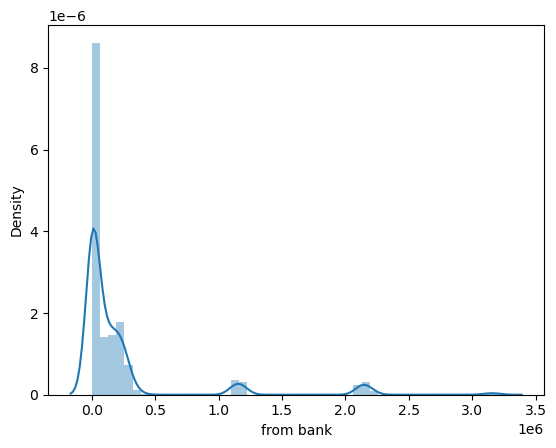


*************************************************************

Skewness of 'from bank' column: 3.390350921173509


In [11]:
num_col_uni(df,"from bank")

# **'to bank'**

Description of 'to bank' column:
count    7.046000e+04
mean     3.089934e+05
std      5.687517e+05
min      0.000000e+00
25%      1.756900e+04
50%      1.182470e+05
75%      2.286500e+05
max      3.223433e+06
Name: to bank, dtype: float64

*************************************************************

NUnique values of 'to bank' column:
6117

*************************************************************

Unique values of 'to bank' column:
[  20724 2153437 1140210 ... 1129736 1138398 2155168]

*************************************************************

Minimum value of 'to bank' column: 0
Maximum value of 'to bank' column: 3223433

*************************************************************

Distribution of 'to bank' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\2876068652.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


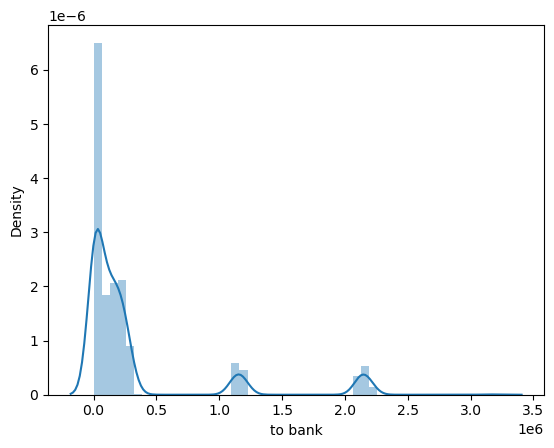


*************************************************************

Skewness of 'to bank' column: 2.5089948100650856


In [12]:
num_col_uni(df,"to bank")

# **'amount received'**

Description of 'amount received' column:
count    7.046000e+04
mean     2.776800e+07
std      3.529274e+09
min      1.000000e-06
25%      7.407550e+02
50%      4.607235e+03
75%      1.623122e+04
max      9.062701e+11
Name: amount received, dtype: float64

*************************************************************

NUnique values of 'amount received' column:
66128

*************************************************************

Unique values of 'amount received' column:
[ 7376.49  1462.51  1478.01 ... 79778.82  2091.34 16268.86]

*************************************************************

Minimum value of 'amount received' column: 1e-06
Maximum value of 'amount received' column: 906270078070.88

*************************************************************

Distribution of 'amount received' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\2876068652.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


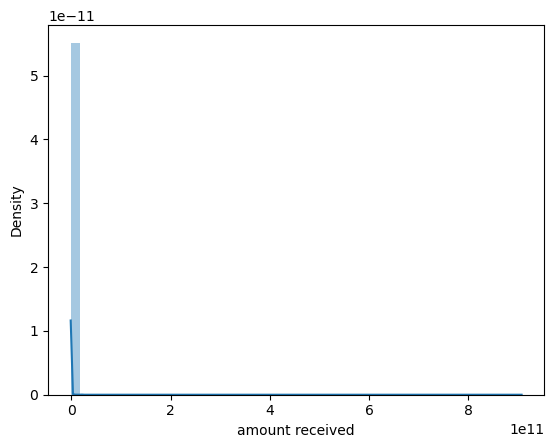


*************************************************************

Skewness of 'amount received' column: 242.2478615316498


In [13]:
num_col_uni(df,"amount received")

# **'amount paid'**

Description of 'amount paid' column:
count    7.046000e+04
mean     2.774228e+07
std      3.529273e+09
min      1.000000e-06
25%      7.421775e+02
50%      4.605840e+03
75%      1.622514e+04
max      9.062701e+11
Name: amount paid, dtype: float64

*************************************************************

NUnique values of 'amount paid' column:
66165

*************************************************************

Unique values of 'amount paid' column:
[ 7376.49  1462.51  1478.01 ... 79778.82  2091.34 16268.86]

*************************************************************

Minimum value of 'amount paid' column: 1e-06
Maximum value of 'amount paid' column: 906270078070.88

*************************************************************

Distribution of 'amount paid' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\2876068652.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


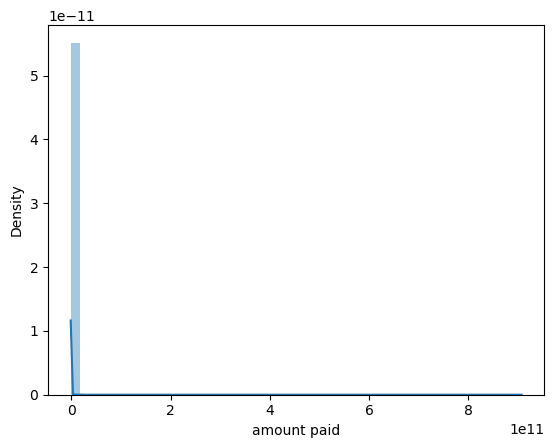


*************************************************************

Skewness of 'amount paid' column: 242.24796286026475


In [14]:
num_col_uni(df,"amount paid")

# ** 'is laundering'**

Description of 'is laundering' column:
count    70460.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: is laundering, dtype: float64

*************************************************************

NUnique values of 'is laundering' column:
2

*************************************************************

Unique values of 'is laundering' column:
[0 1]

*************************************************************

Minimum value of 'is laundering' column: 0
Maximum value of 'is laundering' column: 1

*************************************************************

Distribution of 'is laundering' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\2876068652.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


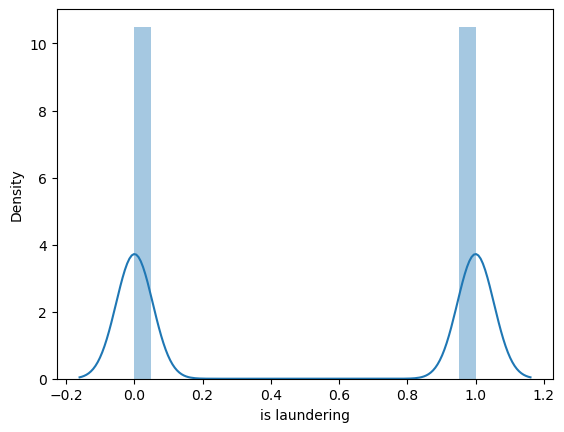


*************************************************************

Skewness of 'is laundering' column: 0.0


In [15]:
num_col_uni(df,"is laundering")

# **univariate of catogorical column**

In [16]:


def cat_col_uni(df, column_name):


  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column
  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Value counts
  print(f"\nValue counts of '{column_name}' column:")
  print(df[column_name].value_counts())

  print("\n*************************************************************")

  # Countplot

  if df[column_name].nunique()<30:


    print(f"\nCountplot of '{column_name}' column:")
    sns.countplot(x=df[column_name])
    plt.xticks(rotation=90)
    plt.show()

    print("\n*************************************************************")

  # Mode
  print(f"\nMode of '{column_name}' column:")
  print(df[column_name].mode().tolist())

  print("\n*************************************************************")


  # Most frequent value and its percentage
  most_frequent_value = df[column_name].value_counts().idxmax()
  most_frequent_percentage = (df[column_name] == most_frequent_value).mean() * 100
  print(f"\nMost frequent value: {most_frequent_value} ({most_frequent_percentage:.2f}%)")

  print("\n*************************************************************")

  # Least frequent value and its percentage
  least_frequent_value = df[column_name].value_counts().idxmin()
  least_frequent_percentage = (df[column_name] == least_frequent_value).mean() * 100
  print(f"\nLeast frequent value: {least_frequent_value} ({least_frequent_percentage:.2f}%)")

  print("\n*************************************************************")


# **'account'**

In [17]:
cat_col_uni(df,"account")

Description of 'account' column:
count         70460
unique        52777
top       100428660
freq           2632
Name: account, dtype: object

*************************************************************

NUnique values of 'account' column:
52777

*************************************************************

Unique values of 'account' column:
['8053a7450' '8341dc7f0' '835ca35c0' ... '838daa880' '83e9abd80'
 '84b82a710']

*************************************************************

Value counts of 'account' column:
account
100428660    2632
1004286a8    1725
1004286f0     494
1004289c0     341
100428858     281
             ... 
81e5ca2d0       1
80377cc20       1
8222e0c70       1
80fadf770       1
84b82a710       1
Name: count, Length: 52777, dtype: int64

*************************************************************

Mode of 'account' column:
['100428660']

*************************************************************

Most frequent value: 100428660 (3.74%)

*********************

# **'account.1'**

[link text](https:// [link text](https://))

In [18]:
cat_col_uni(df,"account.1")

Description of 'account.1' column:
count         70460
unique        60336
top       81c393430
freq             45
Name: account.1, dtype: object

*************************************************************

NUnique values of 'account.1' column:
60336

*************************************************************

Unique values of 'account.1' column:
['80c0323a0' '838c71cb0' '83636f140' ... '838daf3b0' '83e9abdd0'
 '84b82d910']

*************************************************************

Value counts of 'account.1' column:
account.1
81c393430    45
81bbea160    41
824bf8940    40
800ed43d0    37
824bf4150    28
             ..
812be8880     1
8000da3e0     1
8299a3720     1
8088b9550     1
84b82d910     1
Name: count, Length: 60336, dtype: int64

*************************************************************

Mode of 'account.1' column:
['81c393430']

*************************************************************

Most frequent value: 81c393430 (0.06%)

*****************************

# ***'receiving currency',***
      

Description of 'receiving currency' column:
count         70460
unique           15
top       us dollar
freq          26981
Name: receiving currency, dtype: object

*************************************************************

NUnique values of 'receiving currency' column:
15

*************************************************************

Unique values of 'receiving currency' column:
['us dollar' 'mexican peso' 'euro' 'ruble' 'yen' 'swiss franc' 'yuan'
 'rupee' 'canadian dollar' 'uk pound' 'saudi riyal' 'australian dollar'
 'shekel' 'bitcoin' 'brazil real']

*************************************************************

Value counts of 'receiving currency' column:
receiving currency
us dollar            26981
euro                 17852
yuan                  5295
uk pound              2718
ruble                 2563
shekel                2263
yen                   2045
canadian dollar       1807
australian dollar     1730
rupee                 1705
mexican peso          1322
swiss fran

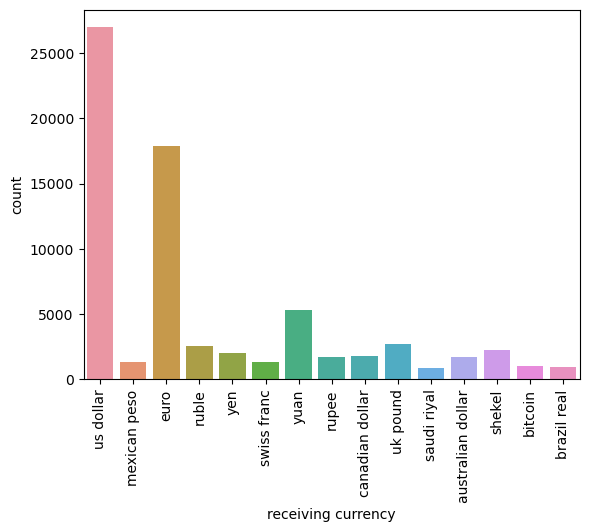


*************************************************************

Mode of 'receiving currency' column:
['us dollar']

*************************************************************

Most frequent value: us dollar (38.29%)

*************************************************************

Least frequent value: saudi riyal (1.26%)

*************************************************************


In [19]:
cat_col_uni(df,"receiving currency")

# **'payment currency'**

Description of 'payment currency' column:
count         70460
unique           15
top       us dollar
freq          27085
Name: payment currency, dtype: object

*************************************************************

NUnique values of 'payment currency' column:
15

*************************************************************

Unique values of 'payment currency' column:
['us dollar' 'mexican peso' 'euro' 'ruble' 'yen' 'swiss franc' 'yuan'
 'rupee' 'canadian dollar' 'uk pound' 'saudi riyal' 'australian dollar'
 'shekel' 'bitcoin' 'brazil real']

*************************************************************

Value counts of 'payment currency' column:
payment currency
us dollar            27085
euro                 17824
yuan                  5334
uk pound              2714
ruble                 2557
shekel                2245
yen                   2037
canadian dollar       1804
australian dollar     1715
rupee                 1700
mexican peso          1316
swiss franc           

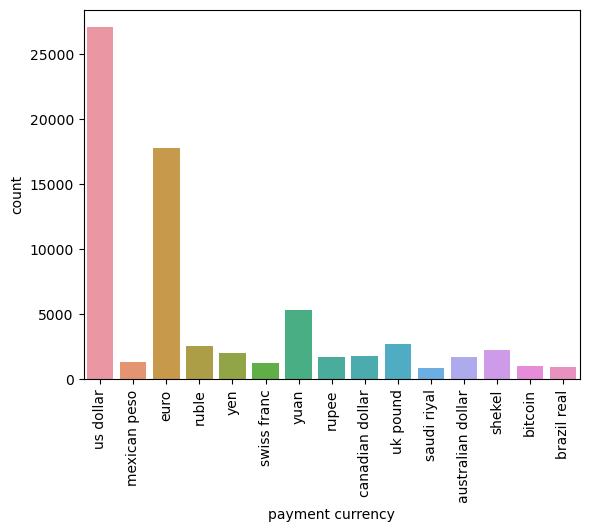


*************************************************************

Mode of 'payment currency' column:
['us dollar']

*************************************************************

Most frequent value: us dollar (38.44%)

*************************************************************

Least frequent value: saudi riyal (1.24%)

*************************************************************


In [20]:
cat_col_uni(df,"payment currency")

# **bi variate analysis and multi variate analysis**





In [21]:
df

,timestamp,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,is laundering
0,2022/09/09 06:20,29574,8053a7450,20724,80c0323a0,7376.49,us dollar,7376.49,us dollar,cash,0
1,2022/09/07 21:14,2142469,8341dc7f0,2153437,838c71cb0,1462.51,mexican peso,1462.51,mexican peso,ach,0
2,2022/09/09 03:15,1145753,835ca35c0,1140210,83636f140,1478.01,mexican peso,1478.01,mexican peso,credit card,0
3,2022/09/02 08:41,218456,8087af690,42983,820dd8f60,2573.59,euro,2573.59,euro,cheque,0
4,2022/09/15 22:44,9340,80f9c4840,34340,81fb792a0,50.16,us dollar,50.16,us dollar,credit card,0
...,...,...,...,...,...,...,...,...,...,...,...
70455,2022/09/21 17:07,295233,8230ce9c0,1818,80d7bb990,4365.08,us dollar,4365.08,us dollar,ach,1
70456,2022/09/16 23:55,70,1004288e8,1141540,838131750,5413.94,mexican peso,5413.94,mexican peso,cheque,1
70457,2022/09/16 23:57,2147650,838daa880,2155168,838daf3b0,79778.82,mexican peso,79778.82,mexican peso,ach,1
70458,2022/09/16 23:30,2167121,83e9abd80,1166873,83e9abdd0,2091.34,swiss franc,2091.34,swiss franc,ach,1


In [22]:
num_col

Index(['from bank', 'to bank', 'amount received', 'amount paid',
       'is laundering'],
      dtype='object')

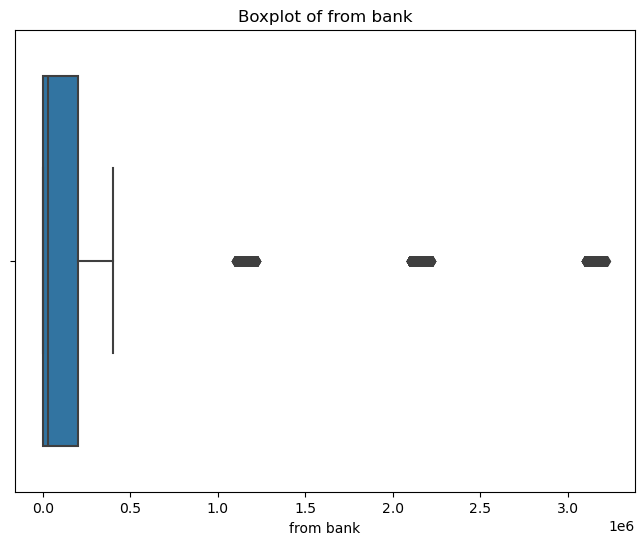

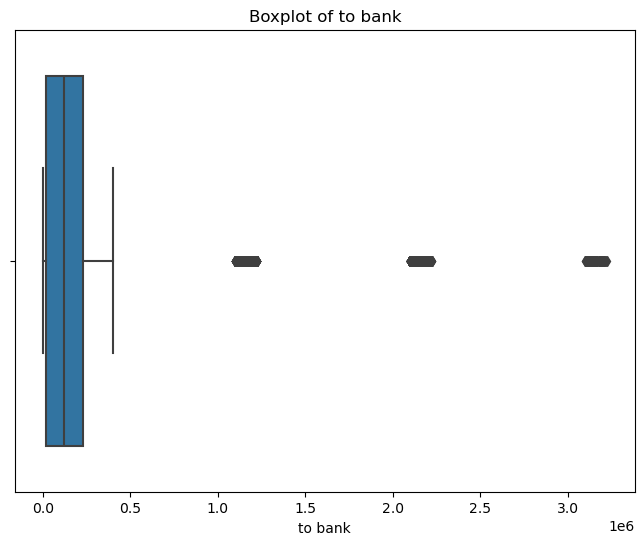

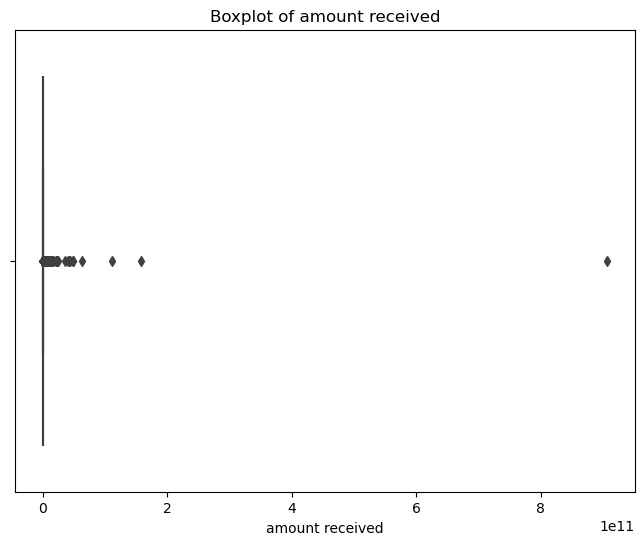

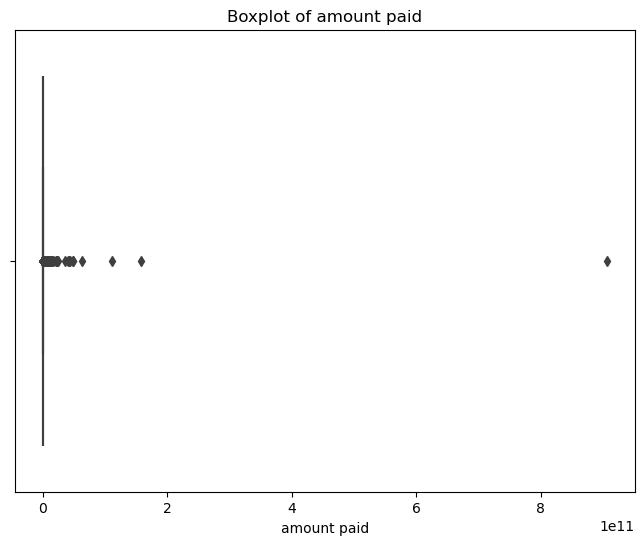

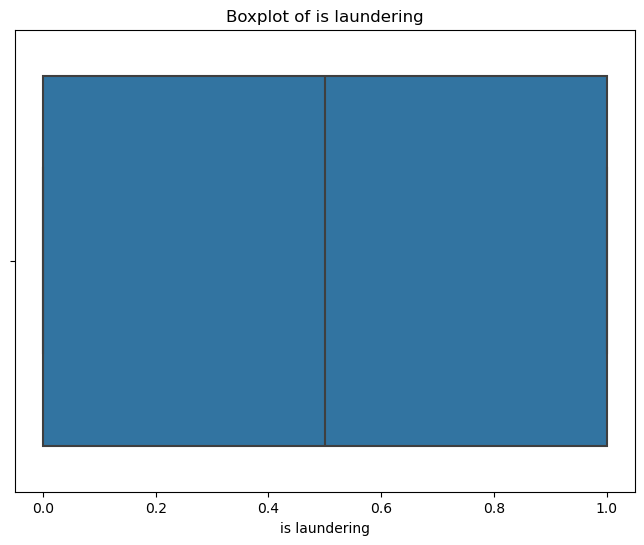

C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\1939928474.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\1939928474.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '501552.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column[column > right] = right
C:\Users\jeeva\AppData\Local\Temp\ipykernel_20204\1939928474.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jeeva\AppDa

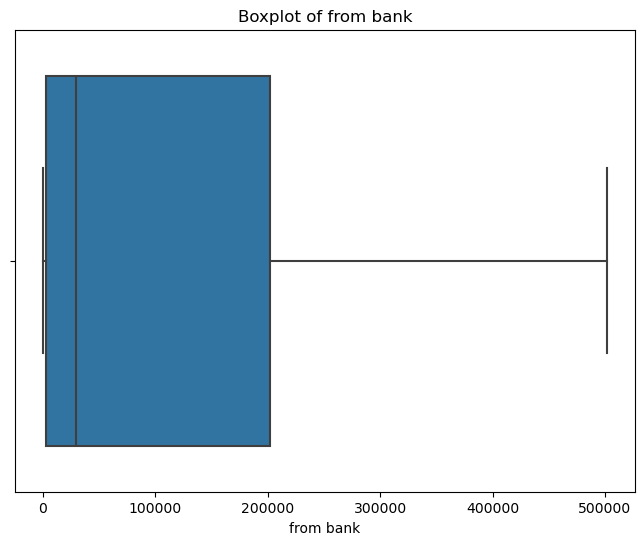

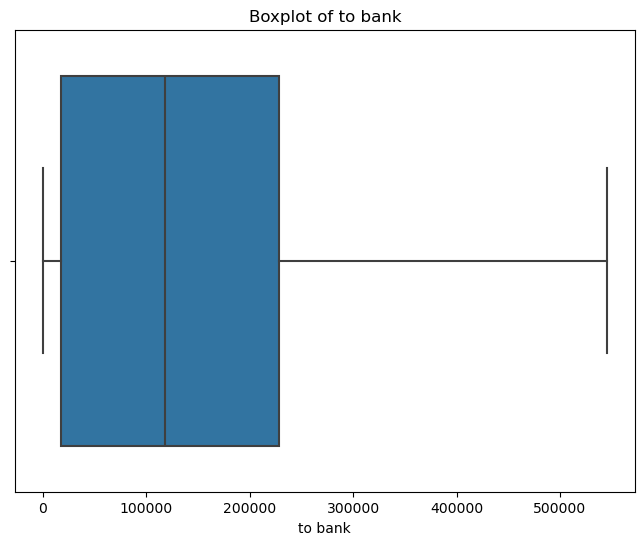

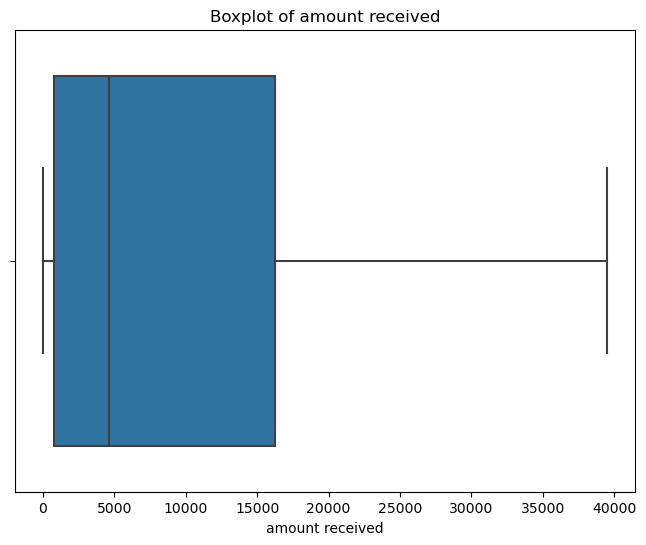

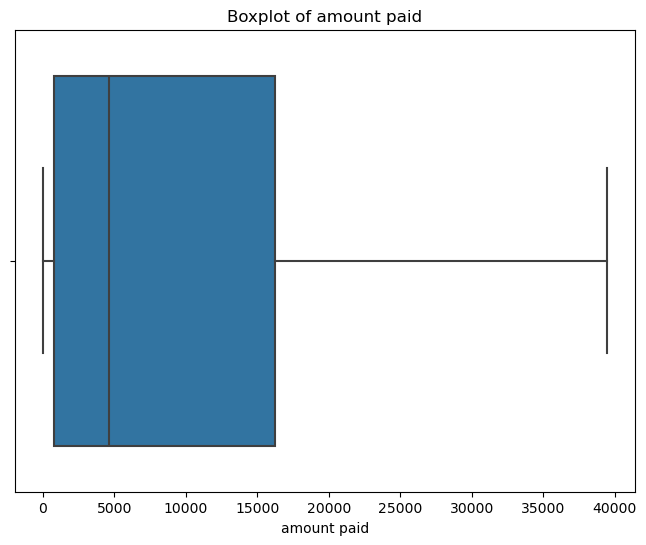

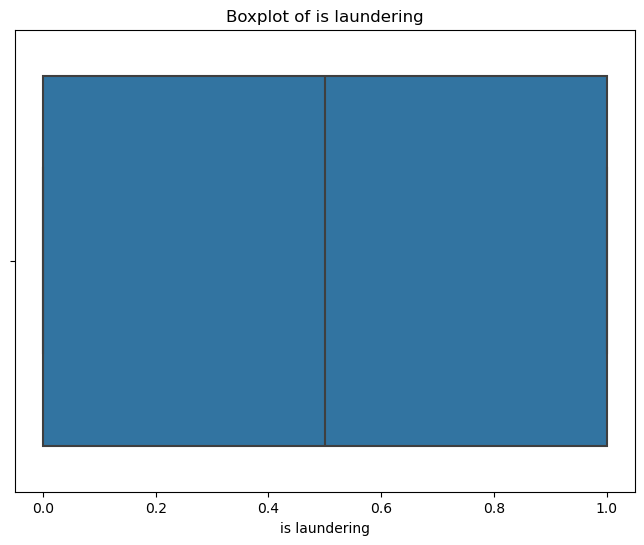

In [23]:




for i in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


# fuction for caping the outliers by iqr method

def iqr(column):
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    rang = q3 - q1
    right = q3 + rang * 1.5
    left = q1 - rang * 1.5

    # Caping extreme values
    column[column > right] = right
    column[column < left] = left

    return column
# executing the fuxction

for i in num_col:

    df[i] = iqr(df[i])


# dataframe after the outliers



for i in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()



<Axes: xlabel='from bank'>

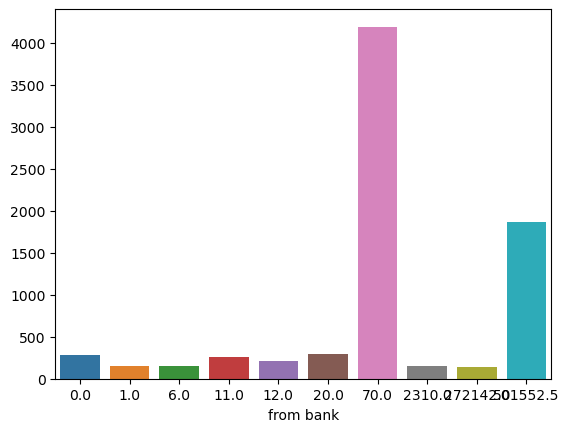

In [24]:

a=df.groupby("from bank")["is laundering"].sum().sort_values(ascending=False).index[0:10]
b=df.groupby("from bank")["is laundering"].sum().sort_values(ascending=False).values[0:10]
sns.barplot(x=a,y=b)

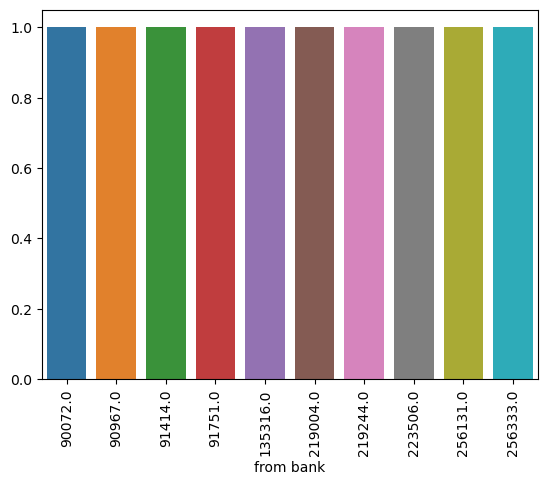

In [25]:
filter=df.groupby("from bank")["is laundering"].sum().sort_values()

a= filter[filter != 0].sort_values().index[0:10]

b= filter[filter != 0].sort_values().values[0:10]

sns.barplot(x=a,y=b)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='to bank'>

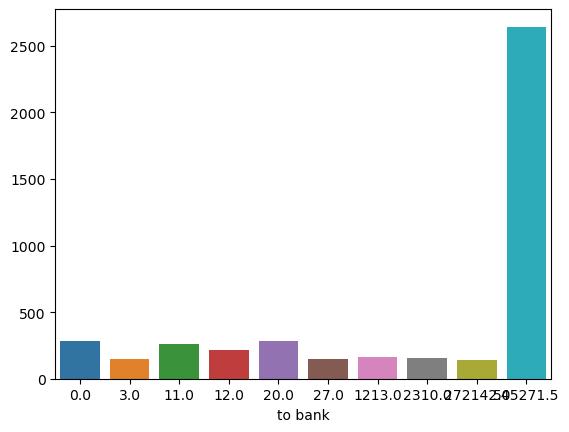

In [26]:

a=df.groupby("to bank")["is laundering"].sum().sort_values(ascending=False).index[0:10]
b=df.groupby("to bank")["is laundering"].sum().sort_values(ascending=False).values[0:10]
sns.barplot(x=a,y=b)

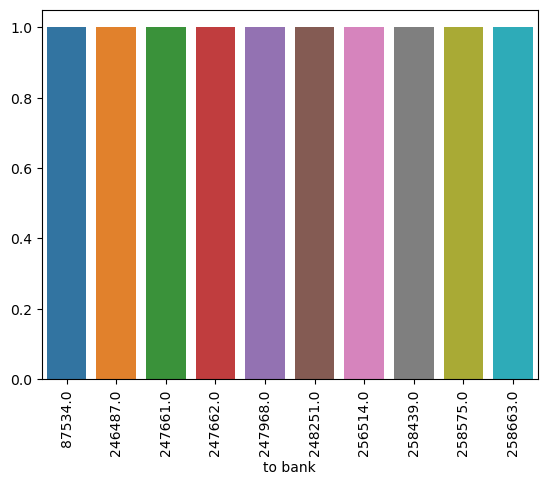

In [27]:
filter=df.groupby("to bank")["is laundering"].sum().sort_values()

a= filter[filter != 0].sort_values().index[0:10]

b= filter[filter != 0].sort_values().values[0:10]

sns.barplot(x=a,y=b)
plt.xticks(rotation=90)
plt.show()

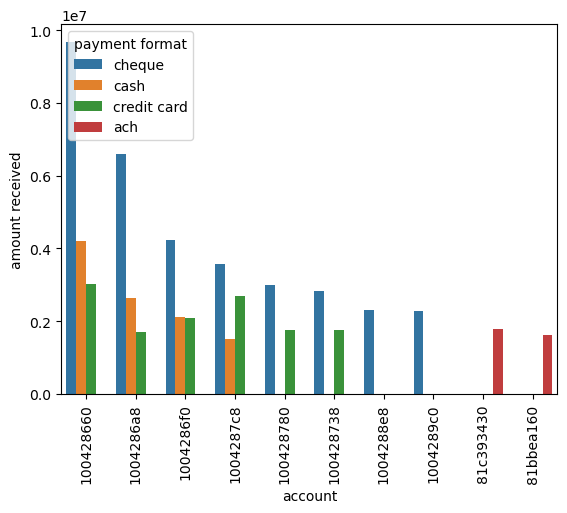

In [28]:
daata=df.groupby(["account", "payment format"])["amount received"].sum().sort_values(ascending=False)[0:20]

data=pd.DataFrame(daata)
data=data.reset_index()

sns.barplot(x="account",y="amount received",hue="payment format",data=data)

plt.xticks(rotation=90)
plt.show()

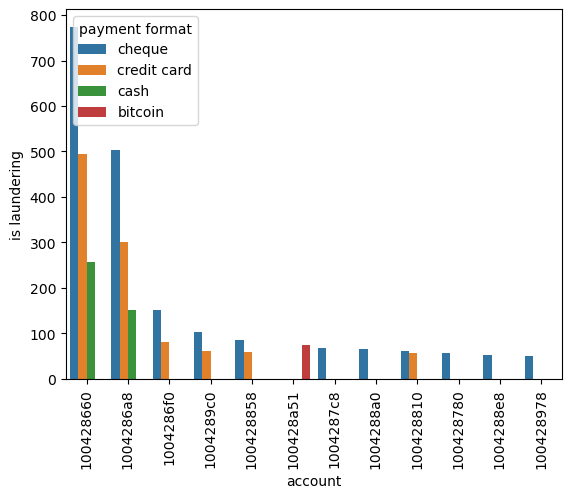

In [29]:
daata=df.groupby(["account", "payment format"])["is laundering"].sum().sort_values(ascending=False)[0:20]

data=pd.DataFrame(daata)
data=data.reset_index()
sns.barplot(x="account",y="is laundering",hue="payment format",data=data)

plt.xticks(rotation=90)
plt.show()

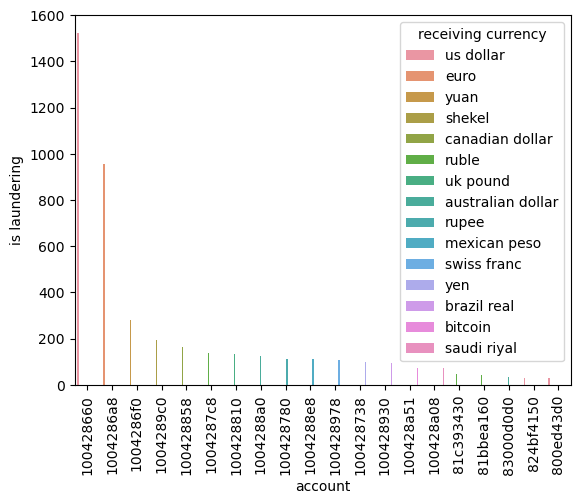

In [30]:
daata=df.groupby(["account", "receiving currency"])["is laundering"].sum().sort_values(ascending=False)[0:20]

data=pd.DataFrame(daata)
data=data.reset_index()
sns.barplot(x="account",y="is laundering",hue="receiving currency",data=data)

plt.xticks(rotation=90)
plt.show()

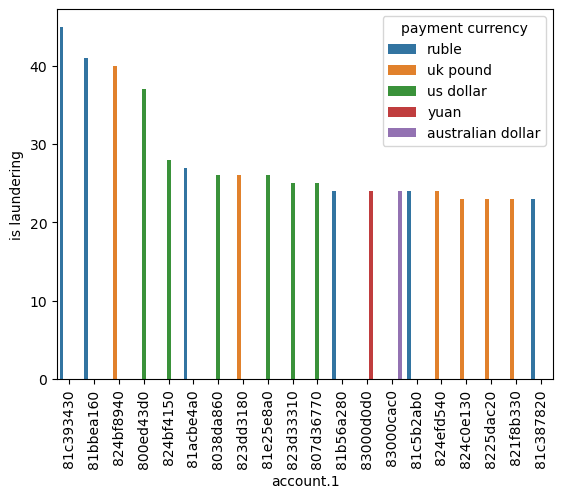

In [31]:
daata=df.groupby(["account.1", "payment currency"])["is laundering"].sum().sort_values(ascending=False)[0:20]

data=pd.DataFrame(daata)
data=data.reset_index()
sns.barplot(x="account.1",y="is laundering",hue="payment currency",data=data)

plt.xticks(rotation=90)
plt.show()

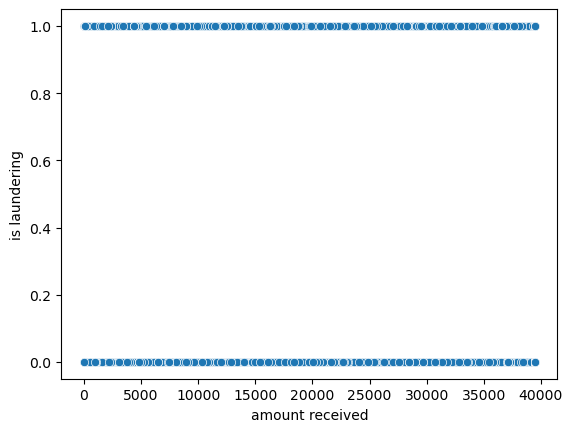

In [32]:
sns.scatterplot(x="amount received",y="is laundering",data=df)

plt.show()

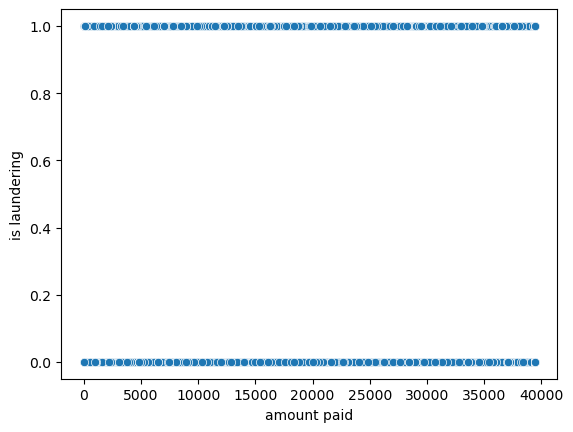

In [33]:
sns.scatterplot(x="amount paid",y="is laundering",data=df)

plt.show()

# **creating the new columns**

> Add blockquote



In [34]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [35]:


df["year"]=df["timestamp"].dt.year
df["month"]=df["timestamp"].dt.month
df["day"]=df["timestamp"].dt.day
df["hour"]=df["timestamp"].dt.hour
df["min"]=df["timestamp"].dt.minute
df["sec"]=df["timestamp"].dt.second
df['day_type'] = df['timestamp'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')
df['day_of_week'] = df['timestamp'].dt.day_name()

In [36]:
## advanced

In [37]:
l=['us dollar', 'euro', "ruble", 'yuan', "shekel"]
df["currency_focus"]=df["payment currency"].apply(lambda x: "focus" if x in l else "not focus")

In [38]:
l2 = [ 'cheque', 'credit card', 'cash',
       'bitcoin']

df["format_focus"]=df["payment currency"].apply(lambda x: "focus" if x in l2 else "not focus")

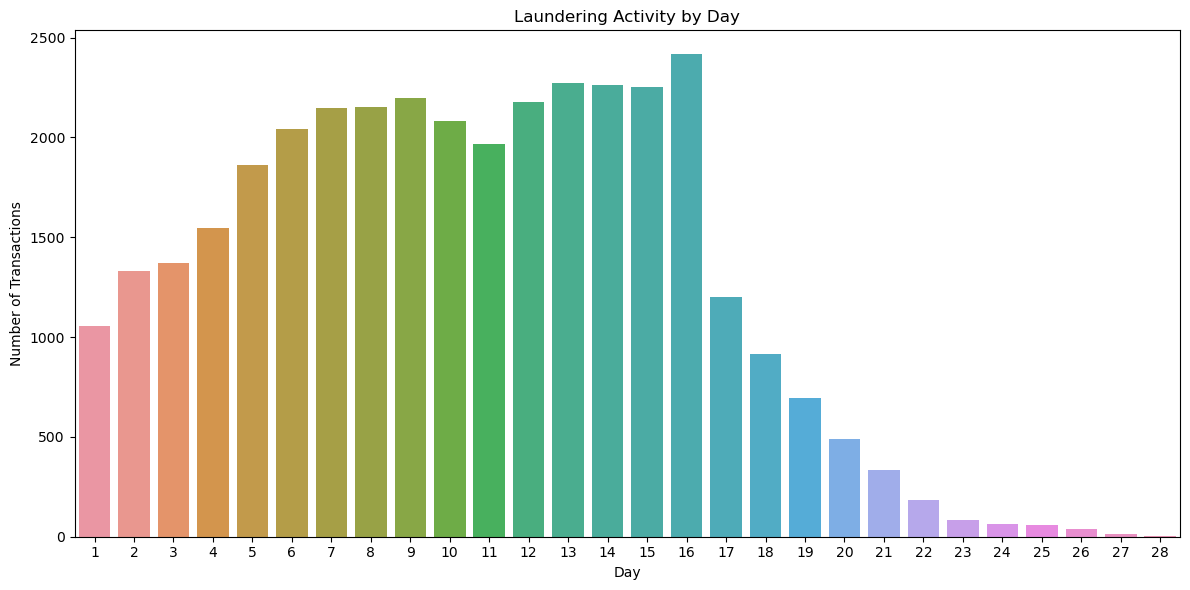

In [39]:
plt.figure(figsize=(12, 6))

# No need for 'hue' as you're filtering for 'is laundering' == 1
sns.countplot(x='day', data=df[df['is laundering'] == 1])

plt.title('Laundering Activity by Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


In [40]:
level1=[5,6,7,8,9,10,11,12,13,14,15,16]
level2=[17,18,19,1,2,3,4,20,21]
level3=[22,23,24,25,26,27,28]

In [41]:
def intensity(x):
  if x in level1:
    return "high"
  elif x in level2:
    return "medium"
  else:
    return "low"

In [42]:
df["day_intensity"]=df["day"].apply(intensity)

In [43]:
df = df.drop(df.columns[0], axis=1)


In [44]:
# @title Default title text
# sns.pairplot(df[num_col])
 #plt.show()

In [45]:
#correlation_matrix = df.corr()

#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Matrix")
#plt.show()

# **splitting the data**

# for ml **models**

In [73]:
x=df.drop("is laundering",axis=1)
y=df["is laundering"]





num_col = x.select_dtypes(include='number').columns
print(num_col)

cat_col = x.select_dtypes(include='object').columns
print(cat_col)

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x, y, test_size=0.3, random_state=42)





Index(['from bank', 'to bank', 'amount received', 'amount paid', 'year',
       'month', 'day', 'hour', 'min', 'sec'],
      dtype='object')
Index(['account', 'account.1', 'receiving currency', 'payment currency',
       'payment format', 'day_type', 'day_of_week', 'currency_focus',
       'format_focus', 'day_intensity'],
      dtype='object')


In [86]:
x_train_m

,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,year,month,day,hour,min,sec,day_type,day_of_week,currency_focus,format_focus,day_intensity
6827484,114976.0,81b4f6f20,227981.0,82fb93540,78.970000,us dollar,78.970000,us dollar,cheque,2022,9,2,18,39,0,weekday,Friday,focus,not focus,medium
16434458,119335.0,81092fb40,13688.0,813723300,2629.690000,us dollar,2629.690000,us dollar,ach,2022,9,13,4,11,0,weekday,Tuesday,focus,not focus,high
9106987,2609.0,805e0b530,4191.0,804978e00,14483.090000,euro,14483.090000,euro,ach,2022,9,9,14,44,0,weekday,Friday,focus,not focus,high
23651943,501552.5,84fbefa71,545271.5,851c1c9d1,2.116437,bitcoin,2.116437,bitcoin,bitcoin,2022,9,13,6,26,0,weekday,Tuesday,not focus,focus,high
21727830,2310.0,800f86b30,0.0,800076ff0,4837.420000,us dollar,4837.420000,us dollar,ach,2022,9,17,14,8,0,weekend,Saturday,focus,not focus,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186113,50719.0,81406bc90,29689.0,8046190e0,17767.930000,us dollar,17767.930000,us dollar,ach,2022,9,1,21,51,0,weekday,Thursday,focus,not focus,medium
20428164,272142.0,81adab830,272896.0,81adbcd50,11388.310000,ruble,11388.310000,ruble,wire,2022,9,11,1,19,0,weekend,Sunday,not focus,not focus,high
19321216,112010.0,81218bbc0,7998.0,803358000,5880.320000,us dollar,5880.320000,us dollar,ach,2022,9,15,19,51,0,weekday,Thursday,focus,not focus,high
11029226,245043.0,821e4cb70,40492.0,84844d420,1974.980000,yuan,1974.980000,yuan,credit card,2022,9,5,23,8,0,weekday,Monday,focus,not focus,high


In [87]:
from sklearn.preprocessing import StandardScaler
categorical_transformer = Pipeline(steps=[
    ('ohe_encoder', LabelEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])



In [88]:
num_coll

Index(['accountfrom bank', 'account.1to bank',
       'receiving currencyamount received', 'payment currencyamount paid',
       'payment formatyear', 'day_typemonth', 'day_of_weekday',
       'currency_focushour', 'format_focusmin', 'day_intensitysec'],
      dtype='object')

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_col),
        ('num', numerical_transformer, num_col)
    ])


In [92]:


categorical_transformer = Pipeline(steps=[
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_col),
        ('num', numerical_transformer, num_col)
    ])



In [93]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(splitter="best", criterion="gini", max_depth=5, min_samples_split=3, min_samples_leaf=5))
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


0.9021194058094427 0.8481499672560576 0.9797635933806147 0.9092185511824844
0.9033899679656138 0.8488494457696085 0.9815047657675928 0.9103699941688769
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [94]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=4,n_estimators=50, criterion="entropy", max_depth=4, min_samples_split=4, min_samples_leaf=5)
)
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


0.8717475636294825 0.8743335872048743 0.8684633569739952 0.8713885857962901
0.8743765459632619 0.8760542720938761 0.8720746298925167 0.8740599211350054
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [125]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',KNeighborsClassifier(n_neighbors=10, weights='uniform')

)
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


0.8659286592865929 0.8583464494028331 0.8766903073286052 0.8674214071856288
0.8907384128786343 0.8839990432910787 0.8994524437233827 0.891658792545385
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [126]:

from xgboost import XGBClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',XGBClassifier()


)
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


0.9023559466363894 0.8737812911725955 0.940709219858156 0.9060109289617486
0.9423583796277524 0.9121381603809235 0.9789900628675725 0.9443824950603517
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [128]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression()


)
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


C:\Users\jeeva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8859873214116757 0.8432114333753677 0.9484633569739953 0.892745883400089
0.929950123677061 0.8888766600631007 0.9827215574934091 0.9334463429198853
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [129]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',SVC()


)
])

model.fit(x_train_m, y_train_m)

pre = model.predict(x_test_m)
pre_train = model.predict(x_train_m)

print(accuracy_score(y_test_m, pre), precision_score(y_test_m, pre), recall_score(y_test_m, pre), f1_score(y_test_m, pre))

print(accuracy_score(y_train_m, pre_train), precision_score(y_train_m, pre_train), recall_score(y_train_m, pre_train), f1_score(y_train_m, pre_train))

print("/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


0.8907654461159996 0.8463794837412001 0.9549881796690307 0.8974096947616297
0.9027006204127975 0.8582304972216208 0.9647130399513283 0.9083618171055395
/*/*////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


# **for ann**

In [52]:
x=df.drop("is laundering",axis=1)
y=df["is laundering"]


num_col = x.select_dtypes(include='number').columns
print(num_col)

cat_col = x.select_dtypes(include='object').columns
print(cat_col)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.preprocessing import LabelEncoder



label = LabelEncoder()
columns_to_encode = cat_col

for col in columns_to_encode:
    x_train[col] = label.fit_transform(x_train[col])

for col in columns_to_encode:
    x_test[col] = label.fit_transform(x_test[col])

# Selecting numeric columns
num_coll = x_train.select_dtypes(include='number').columns


scale = MinMaxScaler()

# Fit and transform the training data, and transform the test data
x_train[num_coll] = scale.fit_transform(x_train[num_coll])
x_test[num_coll] = scale.transform(x_test[num_coll])

# Display the updated column names to verify scaling is applied


Index(['from bank', 'to bank', 'amount received', 'amount paid', 'year',
       'month', 'day', 'hour', 'min', 'sec'],
      dtype='object')
Index(['account', 'account.1', 'receiving currency', 'payment currency',
       'payment format', 'day_type', 'day_of_week', 'currency_focus',
       'format_focus', 'day_intensity'],
      dtype='object')


In [56]:
x_train
x_test

,from bank,account,to bank,account.1,amount received,receiving currency,amount paid,payment currency,payment format,year,month,day,hour,min,sec,day_type,day_of_week,currency_focus,format_focus,day_intensity
21067043,0.023300,0.098937,0.043230,0.198893,0.224174,0.285714,0.224273,0.285714,0.500000,0.0,0.0,0.370370,0.913043,0.372881,0.0,1.0,0.500000,0.0,1.0,0.0
2429583,0.291948,0.207997,0.138546,0.392900,0.050360,1.000000,0.050382,1.000000,0.500000,0.0,0.0,0.000000,0.347826,0.593220,0.0,0.0,0.666667,0.0,1.0,1.0
20162816,0.319791,0.389788,0.289051,0.352098,1.000000,0.142857,1.000000,0.142857,0.000000,0.0,0.0,0.333333,0.782609,0.745763,0.0,1.0,0.333333,1.0,1.0,0.0
18255240,0.225259,0.167987,0.036318,0.100633,0.243251,0.285714,0.243358,0.285714,0.000000,0.0,0.0,0.481481,0.130435,0.644068,0.0,0.0,1.000000,0.0,1.0,0.0
75027,0.059768,0.138232,0.054976,0.090746,1.000000,0.857143,1.000000,0.857143,0.833333,0.0,0.0,0.000000,0.000000,0.169492,0.0,0.0,0.666667,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160607,0.477444,0.203015,0.000022,0.098213,0.844333,1.000000,0.844703,1.000000,0.000000,0.0,0.0,0.259259,0.347826,0.881356,0.0,0.0,0.666667,0.0,1.0,0.0
19827067,0.537684,0.271032,0.059466,0.208337,0.059496,0.857143,0.059522,0.857143,0.000000,0.0,0.0,0.333333,0.347826,0.847458,0.0,1.0,0.333333,0.0,1.0,0.0
13425047,0.443569,0.183593,0.037303,0.144389,0.001691,0.857143,0.001691,0.857143,0.500000,0.0,0.0,0.222222,0.173913,0.542373,0.0,0.0,1.000000,0.0,1.0,0.0
29291035,0.016913,0.095493,0.211896,0.120452,0.359494,0.857143,0.359652,0.857143,0.000000,0.0,0.0,0.555556,0.391304,0.067797,0.0,0.0,0.000000,0.0,1.0,0.0


# 
**ann**

In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping



In [ ]:




model=Sequential()
model.add(Dense(64,activation="relu",input_dim=20,kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32,activation="relu",input_dim=15,kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(20,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(15,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(5,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1,activation="sigmoid"))



model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", "Precision", "Recall"])

hist1=model.fit(x_train,y_train,epochs=200, validation_data=(x_test,y_test))





C:\Users\jeeva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - Precision: 0.7566 - Recall: 0.7069 - accuracy: 0.7411 - loss: 0.5360 - val_Precision: 0.8794 - val_Recall: 0.8732 - val_accuracy: 0.8767 - val_loss: 0.3004
Epoch 2/200
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Precision: 0.8503 - Recall: 0.8771 - accuracy: 0.8614 - loss: 0.3308 - val_Precision: 0.8935 - val_Recall: 0.8588 - val_accuracy: 0.8782 - val_loss: 0.2707
Epoch 3/200
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Precision: 0.8473 - Recall: 0.8843 - accuracy: 0.8623 - loss: 0.3039 - val_Precision: 0.8839 - val_Recall: 0.8803 - val_accuracy: 0.8822 - val_loss: 0.2499
Epoch 4/200
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Precision: 0.8466 - Recall: 0.9072 - accuracy: 0.8720 - loss: 0.2855 - val_Precision: 0.8685 - val_Recall: 0.9232 - val_accuracy: 0.8917 - val_loss: 0.2385
Epoch 5/200
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Precision: 0.8546 - Recall: 0.9134 - accuracy: 0.8794 - loss: 0.2706 - val_Precision: 0.83

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

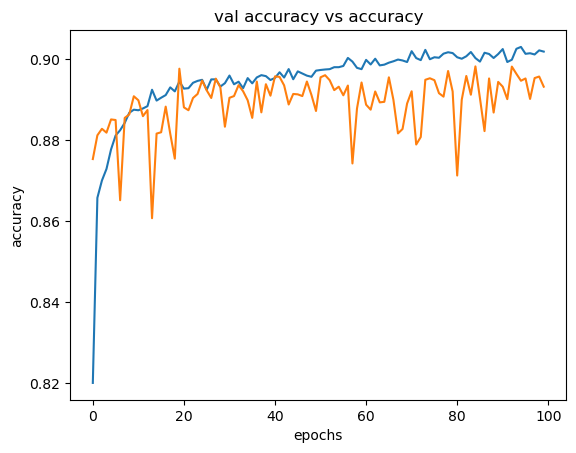

In [123]:
plt.title("val accuracy vs accuracy")

sns.lineplot(x=hist1.epoch,y=hist1.history["accuracy"])
sns.lineplot(x=hist1.epoch,y=hist1.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

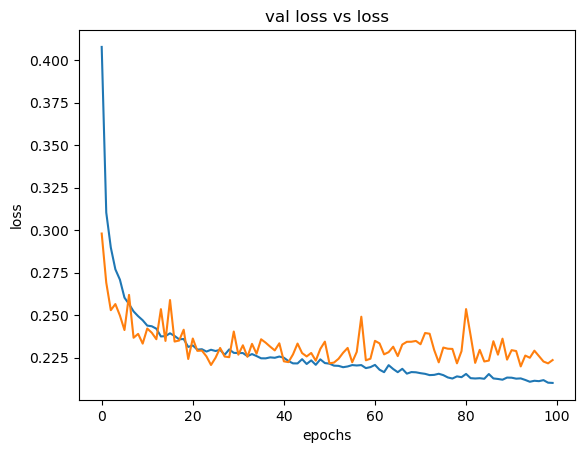

In [122]:
plt.title("val loss vs loss")

sns.lineplot(x=hist1.epoch,y=hist1.history["loss"])
sns.lineplot(x=hist1.epoch,y=hist1.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

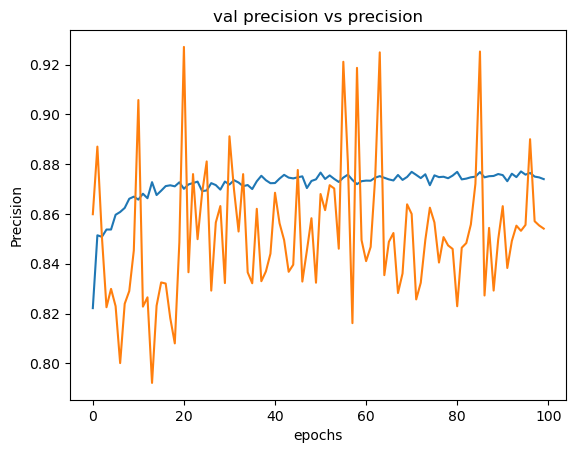

In [121]:
plt.title("val precision vs precision")

sns.lineplot(x=hist1.epoch,y=hist1.history["Precision"])
sns.lineplot(x=hist1.epoch,y=hist1.history["val_Precision"])
plt.xlabel("epochs")
plt.ylabel("Precision")
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

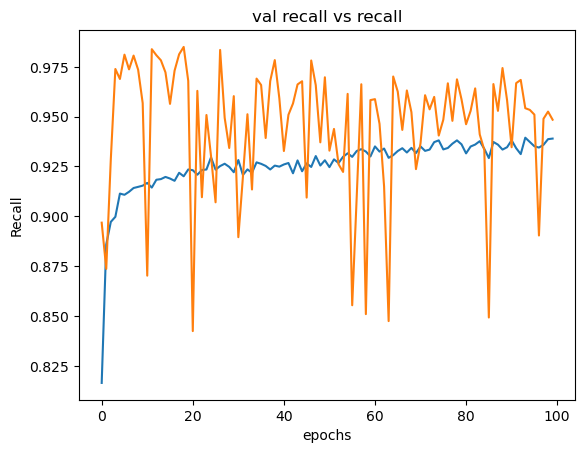

In [120]:
plt.title("val recall vs recall")
sns.lineplot(x=hist1.epoch,y=hist1.history["Recall"])
sns.lineplot(x=hist1.epoch,y=hist1.history["val_Recall"])
plt.xlabel("epochs")
plt.ylabel("Recall")
plt.show()

In [ ]:




model=Sequential()
model.add(Dense(64,activation="relu",input_dim=20,kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32,activation="relu",input_dim=15,kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(20,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(15,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(5,activation="relu",kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1,activation="sigmoid"))



model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", "Precision", "Recall"])

hist1=model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test))





In [73]:
# we can not decid rthe no of layers no of nodes and activation fuction 
# we automate these things with the keras tuner library

In [79]:
import kerastuner as kt

In [86]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(64,activation="relu",input_dim=20,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(32,activation="relu",input_dim=15,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(20,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(15,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(10,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(5,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer=hp.Choice("optimiser",values=["adam","sgd","adagrad","rmsprop"]),metrics=["accuracy", "Precision", "Recall"])

    return model

tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5)


tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

In [87]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5)

# 

C:\Users\jeeva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 4 Complete [00h 00m 32s]
val_accuracy: 0.8859400153160095

Best val_accuracy So Far: 0.8870280981063843
Total elapsed time: 00h 01m 50s


In [90]:
tuner.get_best_hyperparameters()[0].values # we got rmsprop as best 

{'optimiser': 'rmsprop'}

In [104]:
def build_model(hp):

    
    model=Sequential()

    units = hp.Int('units', min_value= 60,max_value=128, step=8)

    
    model.add(Dense(120,activation="relu",input_dim=20,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(64,activation="relu",input_dim=15,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(20,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(15,activation="relu",kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
   
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy", "Precision", "Recall"])

    return model



In [107]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="mydir",
                     project_name="ok")




C:\Users\jeeva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.8901031613349915

Best val_accuracy So Far: 0.8901031613349915
Total elapsed time: 00h 02m 15s


In [109]:
tuner.get_best_hyperparameters()[0].values # we got rmsprop as best 

{'units': 116}

In [110]:
# no of layers

In [128]:
def build_model(hp):

    
    model=Sequential()

    model.add(Dense(120,activation="relu",input_dim=20,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
        

        model.add(Dense(90,activation="relu",kernel_initializer="glorot_uniform"))

    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", "Precision", "Recall"])

    return model



In [129]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="mydir",
                     project_name="layer")




Reloading Tuner from mydir\layer\tuner0.json


In [130]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

In [131]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9}

In [132]:
# 9 layers is giving the best accuracy

In [133]:
best_hps = tuner.get_best_hyperparameters()[0]

model = build_model(best_hps)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))


Epoch 1/100


C:\Users\jeeva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - Precision: 0.8422 - Recall: 0.8719 - accuracy: 0.8552 - loss: 0.3321 - val_Precision: 0.8393 - val_Recall: 0.9426 - val_accuracy: 0.8810 - val_loss: 0.2728
Epoch 2/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.8653 - Recall: 0.9172 - accuracy: 0.8870 - loss: 0.2479 - val_Precision: 0.8931 - val_Recall: 0.8716 - val_accuracy: 0.8836 - val_loss: 0.2727
Epoch 3/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.8594 - Recall: 0.9342 - accuracy: 0.8906 - loss: 0.2340 - val_Precision: 0.8877 - val_Recall: 0.8742 - val_accuracy: 0.8817 - val_loss: 0.2538
Epoch 4/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.8621 - Recall: 0.9410 - accuracy: 0.8955 - loss: 0.2260 - val_Precision: 0.8249 - val_Recall: 0.9765 - val_accuracy: 0.8846 - val_loss: 0.2862
Epoch 5/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.8560 - Recall: 0.9492 - accuracy: 0.8951 - loss: 0.2217 - val_Precision: 0.8580 - val_Reca

In [134]:
# adding both layers and nods

In [137]:

def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=84, max_value=128, step=16),
                    activation=hp.Choice('activation_input', values=['relu', 'tanh']),
                    input_dim=20,
                    kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=84, step=16),
                        activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh']),
                        kernel_initializer="glorot_uniform"))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss="binary_crossentropy",
        metrics=['accuracy', 'Precision', 'Recall']
    )

    return model


In [139]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=10,directory="mydir",
                     project_name="final")




In [140]:
tuner.search(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Trial 10 Complete [00h 03m 26s]
val_accuracy: 0.8937931656837463

Best val_accuracy So Far: 0.8943135738372803
Total elapsed time: 00h 21m 58s


In [141]:
tuner.get_best_hyperparameters()[0].values

{'units_input': 100,
 'activation_input': 'tanh',
 'dropout_input': 0.2,
 'num_layers': 2,
 'units_0': 48,
 'activation_0': 'relu',
 'dropout_0': 0.1,
 'units_1': 32,
 'activation_1': 'tanh',
 'dropout_1': 0.30000000000000004,
 'optimizer': 'rmsprop',
 'units_2': 16,
 'activation_2': 'relu',
 'dropout_2': 0.1,
 'units_3': 16,
 'activation_3': 'relu',
 'dropout_3': 0.30000000000000004,
 'units_4': 64,
 'activation_4': 'tanh',
 'dropout_4': 0.4,
 'units_5': 48,
 'activation_5': 'tanh',
 'dropout_5': 0.2,
 'units_6': 64,
 'activation_6': 'tanh',
 'dropout_6': 0.30000000000000004,
 'units_7': 64,
 'activation_7': 'relu',
 'dropout_7': 0.1,
 'units_8': 48,
 'activation_8': 'relu',
 'dropout_8': 0.30000000000000004}

In [142]:
best_hps = tuner.get_best_hyperparameters()[0]

model = build_model(best_hps)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))


C:\Users\jeeva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - Precision: 0.8318 - Recall: 0.8565 - accuracy: 0.8408 - loss: 0.3747 - val_Precision: 0.8640 - val_Recall: 0.9001 - val_accuracy: 0.8792 - val_loss: 0.2912
Epoch 2/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - Precision: 0.8597 - Recall: 0.8967 - accuracy: 0.8741 - loss: 0.2931 - val_Precision: 0.8586 - val_Recall: 0.9121 - val_accuracy: 0.8809 - val_loss: 0.2801
Epoch 3/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - Precision: 0.8611 - Recall: 0.9017 - accuracy: 0.8773 - loss: 0.2795 - val_Precision: 0.8874 - val_Recall: 0.8730 - val_accuracy: 0.8811 - val_loss: 0.2694
Epoch 4/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - Precision: 0.8632 - Recall: 0.8988 - accuracy: 0.8779 - loss: 0.2690 - val_Precision: 0.8613 - val_Recall: 0.9205 - val_accuracy: 0.8861 - val_loss: 0.2658
Epoch 5/100
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - Precision: 0.8678 - Recall: 0.9032 - accuracy: 0.8821 - loss: 0.2625 - val_Precision: 0.84